## Line plot

The most straight-forward yet very useful plotting graph is the line plot.
With the line plot we achieve the visualisation of a single feature organized in a usually time based reference.

The line plot is ideal if you want to achieve a time critical pattern residing within your data.
In this example we use the prepared taxi dataframe that comes with our plotting library seaborn.

From all possible plotting libraries in Python we opted for the seaborn as it has an optimal combination of simplicity and beaty, yet other libraries are equally powerful.

We begin by importing our neccesary libraries

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

For aestetic reasons we change the figure size to something a bit larger

In [2]:
sns.set(rc={'figure.figsize':(16,12)})

We load our dataset, this dataset contains the trip of taxi's in regions of New York City with timestamps of pickup and dropoff.

In [3]:
taxi_df = sns.load_dataset('taxis')
taxi_df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


As we saw earlier, it is important to prepare the data, due to storage specification they did not parse the dates into a datetime format, which we do here.

In [4]:
taxi_df.pickup = pd.to_datetime(taxi_df.pickup)
taxi_df.dropoff = pd.to_datetime(taxi_df.dropoff)

Before we can do anything with this dataset, we need to format it into a proper format, for our first graph I would like to view the total amount of passengers per day.
This means we have to take our data and resample on the pickup date, taking the sum.

In [5]:
pass_df = taxi_df.set_index('pickup').resample('D').sum()
pass_df.head()

,passengers,distance,fare,tip,tolls,total
pickup,,,,,,
2019-02-28,1,0.90,5.00,0.00,0.00,6.30
2019-03-01,370,640.29,2946.97,442.47,60.34,4213.83
2019-03-02,310,548.70,2358.00,333.97,28.80,3319.02
2019-03-03,264,554.04,2187.89,307.47,34.56,3027.32
2019-03-04,267,583.81,2335.74,334.98,63.36,3269.08


You can almost see the plot here, we have an index of dates and a feature 'passengers', these two will make the backbone of our visualisation.

<AxesSubplot:xlabel='pickup', ylabel='passengers'>

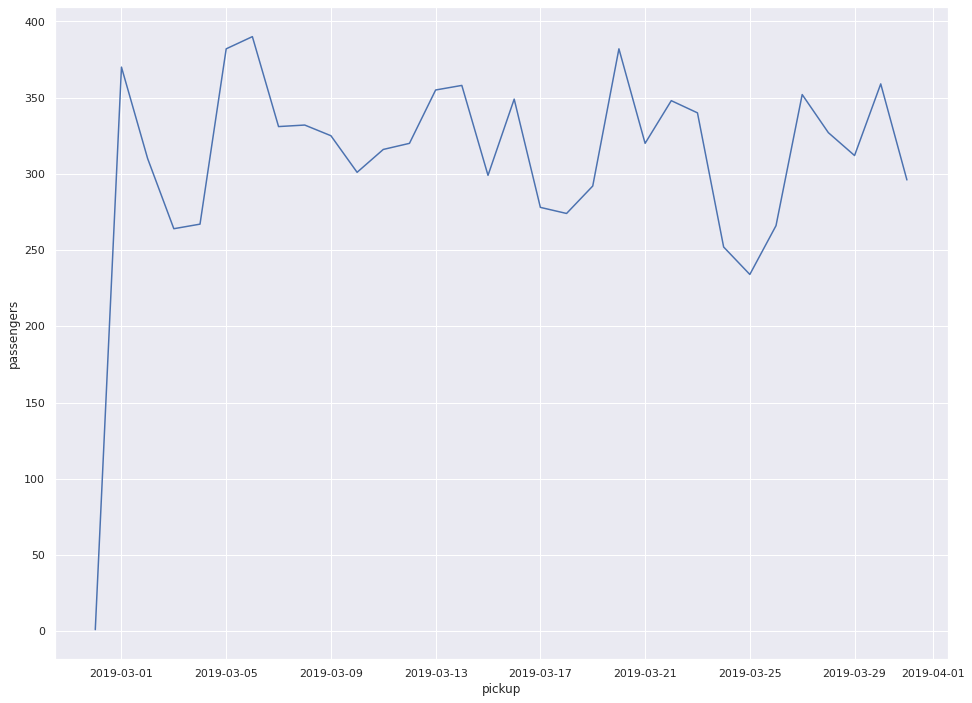

In [6]:
sns.lineplot(x=pass_df.index, y=pass_df.passengers)

Looks about right, however I don't like the start of it, the data started late on that first day, resampling shows we only have 1 passenger for that day.
This is not representable, so we remove that record.

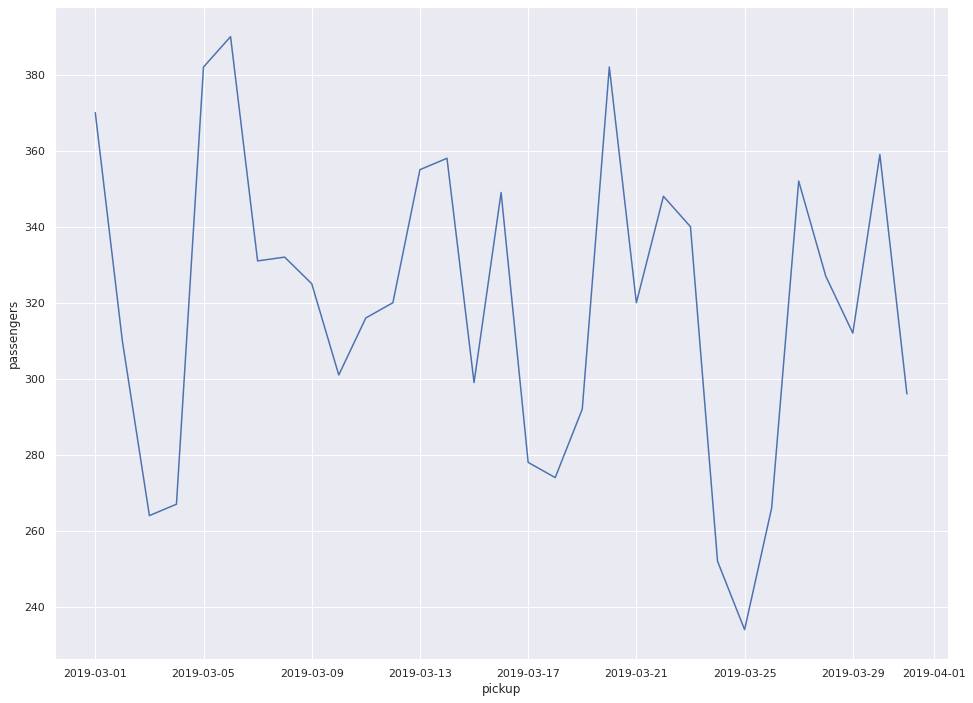

In [7]:
pass_df = pass_df.loc['2019-03-01':]
ax = sns.lineplot(x=pass_df.index, y=pass_df.passengers)

Much better, however the plot feels like there is a lot of fluctuations, so it would be practical to apply a rolling sum or mean.
This rolling operation takes the last x values and applies an operation (sum, mean,...) to it, creating a smoother graph and is visually more sensitive to trends.

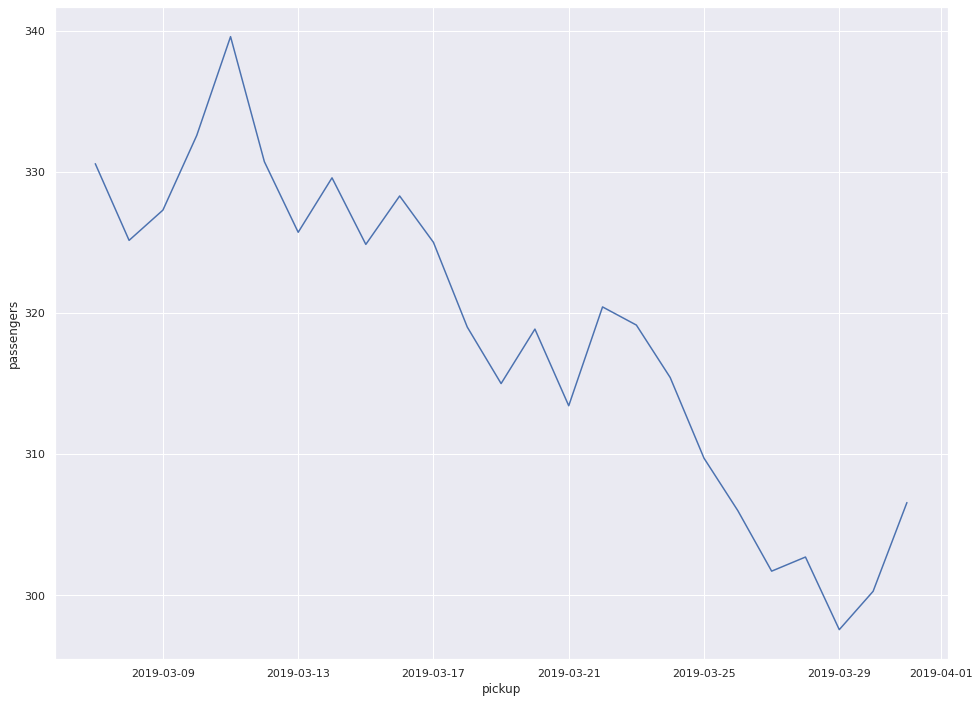

In [8]:
rolling_pass_df = pass_df.rolling(7).mean()
ax = sns.lineplot(x=rolling_pass_df.index, y=rolling_pass_df.passengers)

By applying a rolling mean, we can see that the average amount of passengers per day is decreasing.
I feel there is no need to panick, as this is only 1 month of data and seasonal fluxtuations do happen.

Something else that triggers my curiosity is the amount these passengers paid, can we perhaps see a trend there?
It would be ideal to plot these together so the comparison is simple.

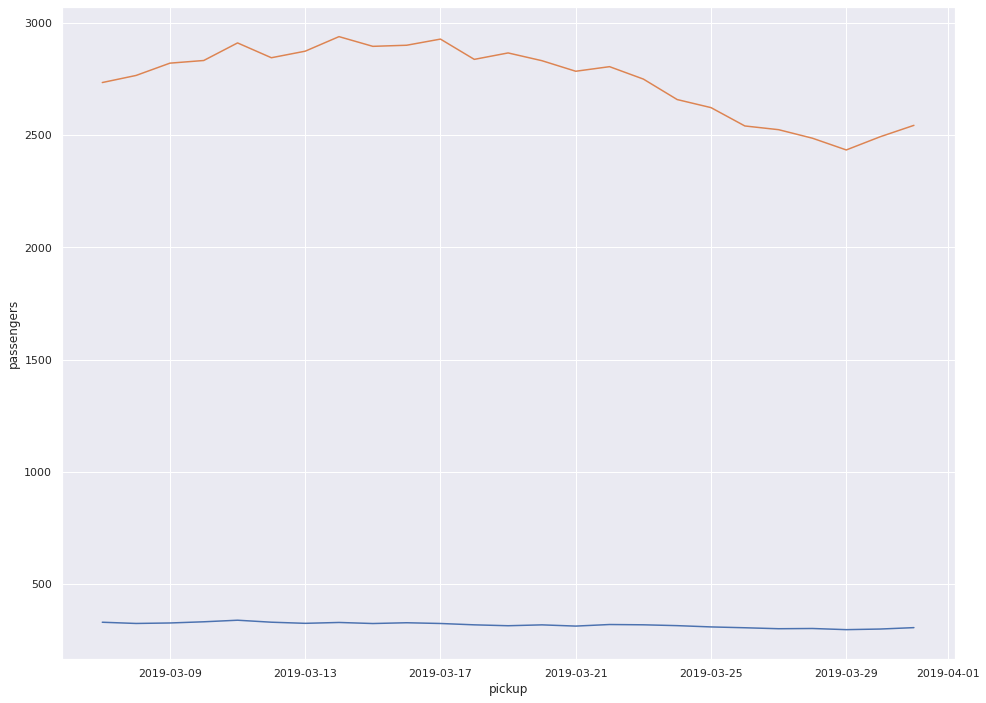

In [9]:
ax = sns.lineplot(x=rolling_pass_df.index, y=rolling_pass_df.passengers)
ax = sns.lineplot(x=rolling_pass_df.index, y=rolling_pass_df.fare, ax=ax)

As we only have a few passengers per trip, yet trips can be costly the ranges of these 2 features are completely different.
Before we think about scaling, we actually do want to know the scale here, we just cant fit them in the same graph.

A first approach would be to use a secondary axis, where the right side of the y-axis is used to show the fare scale.
You can see that the graph is already getting more complicated code-wise, this is where using the right library is key as they usually have built in features for that.

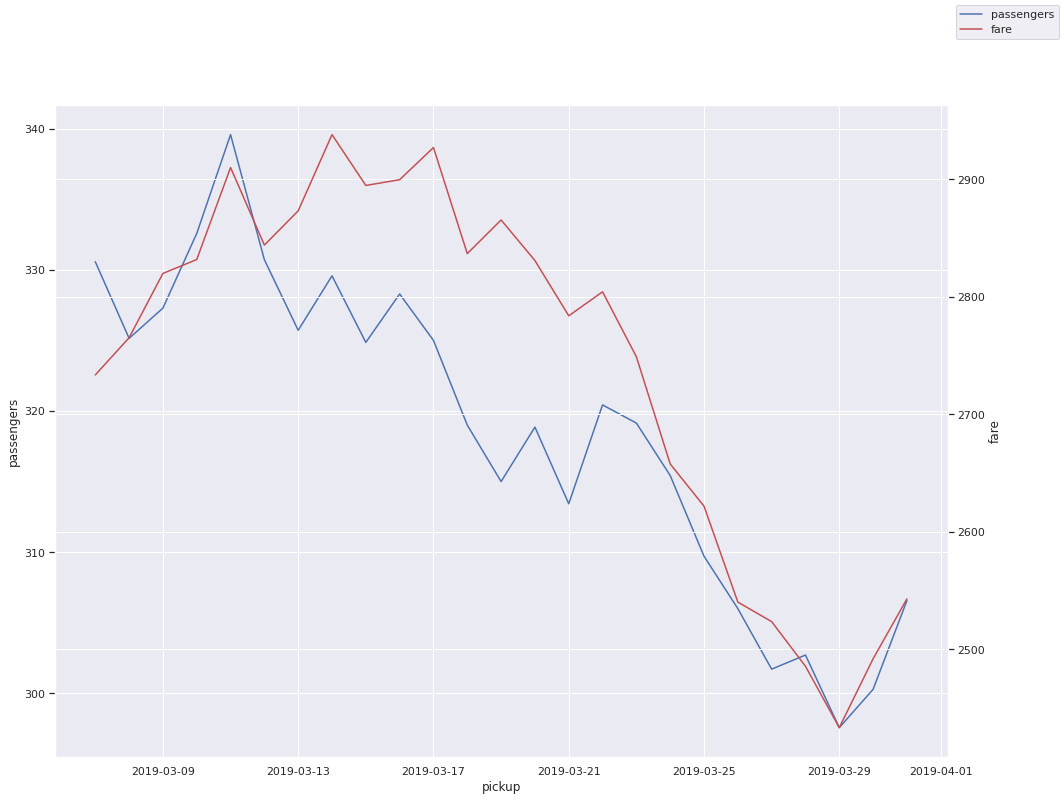

In [10]:
ax = sns.lineplot(x=rolling_pass_df.index, y=rolling_pass_df.passengers, label='passengers', legend=False)
ax2 = ax.twinx()
ax = sns.lineplot(x=rolling_pass_df.index, y=rolling_pass_df.fare, ax=ax2, color='r', label='fare', legend=False)
ax.figure.legend()

Interesting! It shows that there was a period where they did not follow eachother perfect, yet the trend is almost exact for these features.

Another method where you can compare them would require feature engineering, where we calculate the fare per passenger per day, apply the rolling window and plot.
Perhaps you could figure that out? create a new feature that divides the fare by the passengers, recreate the rolling dataframe and use seaborn to plot the results.

At the start we used the sum of passengers per day, however we could also visualise the average amount of passengers per ride.
The reason why I would like to do this is because earlier I saw a difference in trend for the fare and the amount of passengers, an explanation for this could be that the average amount of passengers dropped, resulting in lower passengers, yet the total expenditure of fares would remain constant.

Let us figure this out, we here calculate the average (mean) of the passengers per day.

In [11]:
avg_pass_df = taxi_df.set_index('pickup').resample('D').mean()
avg_pass_df.head()

,passengers,distance,fare,tip,tolls,total
pickup,,,,,,
2019-02-28,1.000000,0.900000,5.000000,0.000000,0.000000,6.300000
2019-03-01,1.535270,2.656805,12.228091,1.835975,0.250373,17.484772
2019-03-02,1.565657,2.771212,11.909091,1.686717,0.145455,16.762727
2019-03-03,1.562130,3.278343,12.946095,1.819349,0.204497,17.913136
2019-03-04,1.561404,3.414094,13.659298,1.958947,0.370526,19.117427


Doing more or less exactly the same we can create a simple plot with the average amount of passengers in a taxi.

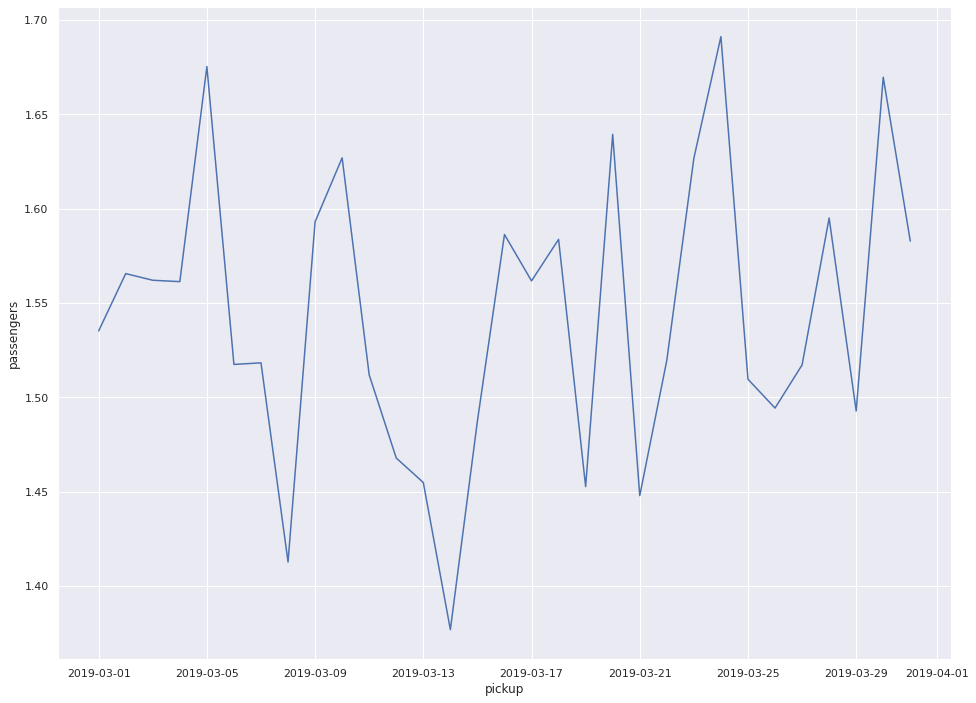

In [12]:
avg_pass_df = avg_pass_df[1:]
ax = sns.lineplot(x=avg_pass_df.index, y=avg_pass_df.passengers)

For the same reasons, this plot is not suitable as it has too much variance.
We apply a rolling mean of 7 days and re-evaluate.

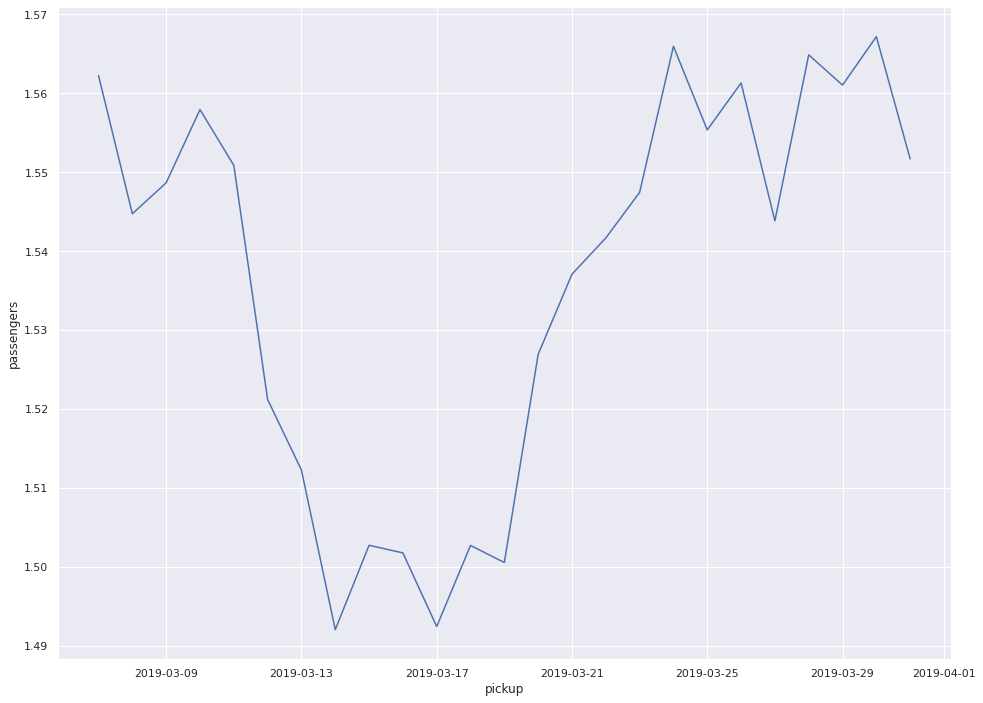

In [13]:
rolling_avg_pass_df = avg_pass_df.rolling(7).mean()
ax = sns.lineplot(x=rolling_avg_pass_df.index, y=rolling_avg_pass_df.passengers)

We find a dip in passengers per ride that looks to be in the same time interval, therefore we could conclude here that fares did not get more expensive, rather the sharing of cabs was less.
You could try and find a method to add the data of these two graphs together, yet this is already advanced visualisation.

Another question that I have for you, do you think that the dip is relevant? Not specifically from a business point of view, rather from a statistical view, Perhaps if you look at the range of the y-axis you might feel that our plot is a bit magnified. This is a good example of how you can use ranges of your axi to make data more dramatic. Be weary of these malpractices!

We are not done yet, as our dataset contains much more information.
Harnessing the powers of the preprocessing we learned, we could include other (mostly categorical) feature into our line plot.

Here we take the payment option (either cash or card) and use it to create 2 time series in long format (2 datasets below each other).

In [14]:
pass_payment_df = taxi_df.groupby('payment').apply(
    lambda x: x.set_index('pickup').resample('D').sum()
)
pass_payment_df

passengers  distance     fare     tip  tolls    total
payment     pickup                                                           
cash        2019-02-28           1      0.90     5.00    0.00   0.00     6.30
            2019-03-01         104    112.31   571.50    0.00   5.76   748.76
            2019-03-02          86    159.46   690.50    0.00   5.76   863.96
            2019-03-03          67    172.34   641.50    0.00  17.28   782.18
            2019-03-04          71    130.60   571.50    0.00   0.00   710.95
...                            ...       ...      ...     ...    ...      ...
credit card 2019-03-27         263    532.61  2260.64  485.63  69.12  3342.29
            2019-03-28         227    403.41  1886.07  404.45  40.32  2802.94
            2019-03-29         211    404.61  1831.98  410.13  23.04  2747.85
            2019-03-30         268    540.71  2211.10  487.97  78.62  3249.49
            2019-03-31         202    376.78  1632.93  345.83  29.16  2408.42

[63 rows x 6 columns]

Seaborn does not like this long format type, therefore we unstack the first index and create a wide format.
For those wo are punctilious, you can notice we created a missing value, with wat should we fill it? (Our luck that seaborn can handle missing values!)

In [15]:
pass_payment_df.unstack(0).head()

passengers             distance               fare              \
payment          cash credit card     cash credit card   cash credit card   
pickup                                                                      
2019-02-28        1.0         NaN     0.90         NaN    5.0         NaN   
2019-03-01      104.0       264.0   112.31      527.08  571.5     2363.97   
2019-03-02       86.0       222.0   159.46      377.74  690.5     1651.50   
2019-03-03       67.0       196.0   172.34      381.60  641.5     1526.39   
2019-03-04       71.0       196.0   130.60      453.21  571.5     1764.24   

            tip              tolls               total              
payment    cash credit card   cash credit card    cash credit card  
pickup                                                              
2019-02-28  0.0         NaN   0.00         NaN    6.30         NaN  
2019-03-01  0.0      442.47   5.76       54.58  748.76     3446.47  
2019-03-02  0.0      333.97   5.76       23.04  863.96     2430.36  
2019-03-03  0.0      307.47  17.28       17.28  782.18     2224.34  
2019-03-04  0.0      334.98   0.00       63.36  710.95     2558.13

Same data, different structure, now seaborn understands the format and we can go back to visualisation.

For simplicity we start with a simple passengers line plot

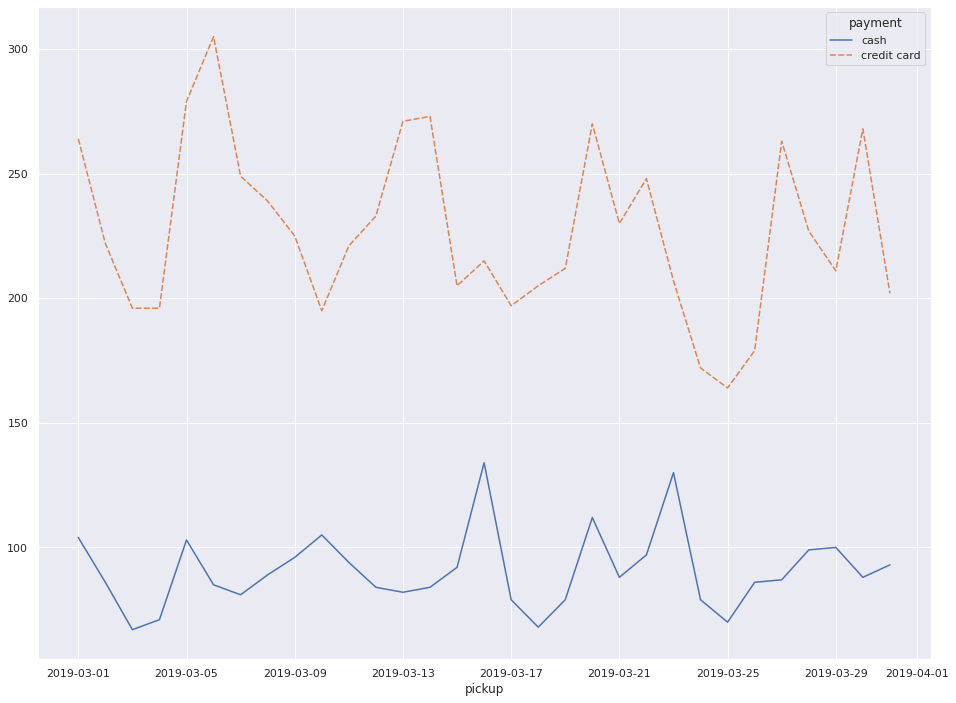

In [16]:
ax = sns.lineplot(data=pass_payment_df.passengers.unstack(0)[1:])

You can see that there are generally more people paying by card, which is more convenient in such an occasion.
Note that here we should not use a seperate y-axis as we are comparing 2 sets of data that are similar by origin.

We do the same for fares.

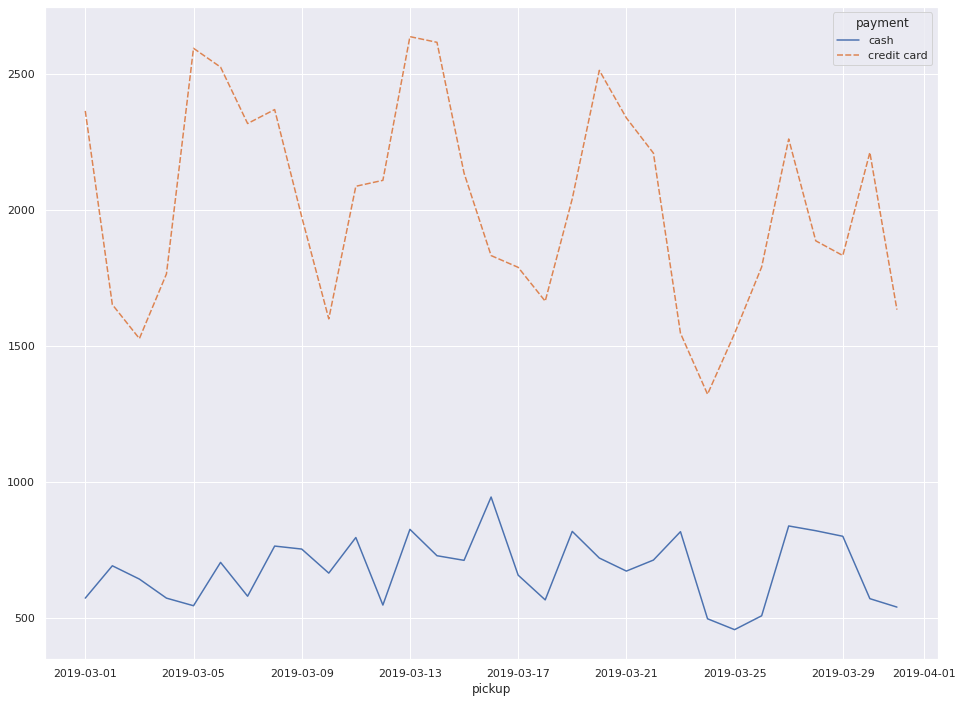

In [17]:
ax = sns.lineplot(data=pass_payment_df.fare.unstack(0)[1:])

This is more or less a no-brainer, as more people pay by card, the fares by card are also more.
So we can't really compare fares with this plot, we have to be creative.

I opted to go for an average fare per passenger, as this is in my opinion more relevant than the amount of rides

In [18]:
pass_payment_df['fare_pass'] = pass_payment_df.fare/pass_payment_df.passengers
pass_payment_df.head()

passengers  distance   fare  tip  tolls   total  fare_pass
payment pickup                                                                
cash    2019-02-28           1      0.90    5.0  0.0   0.00    6.30   5.000000
        2019-03-01         104    112.31  571.5  0.0   5.76  748.76   5.495192
        2019-03-02          86    159.46  690.5  0.0   5.76  863.96   8.029070
        2019-03-03          67    172.34  641.5  0.0  17.28  782.18   9.574627
        2019-03-04          71    130.60  571.5  0.0   0.00  710.95   8.049296

We created a new feature both containing info of fares and passengers, using this we create a new visualisations.

In this visualisation we show for both payment options the average fare amount per passenger in the cab.

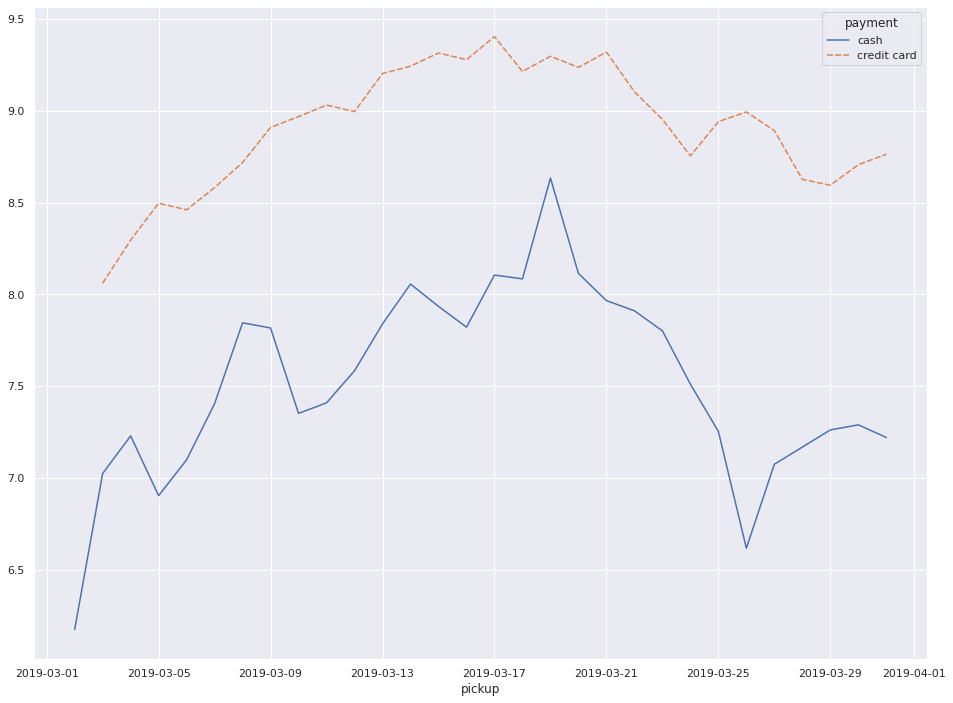

In [19]:
ax = sns.lineplot(data=pass_payment_df.fare_pass.unstack(0).rolling(7, min_periods=3).mean())

We can conclude that the average amount that has to be paid per person is lower for cash, indicating that people jump to their debit card as soon as the amount gets too high.

As a last I would like to emphasise that the x-axis, being time does not have to be linear.
To illustrate this we create a weekly passenger rate and impose each week over the others.

pickup
2019-03-03    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-10    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-17    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-24    AxesSubplot(0.125,0.125;0.775x0.755)
2019-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: W-SUN, dtype: object

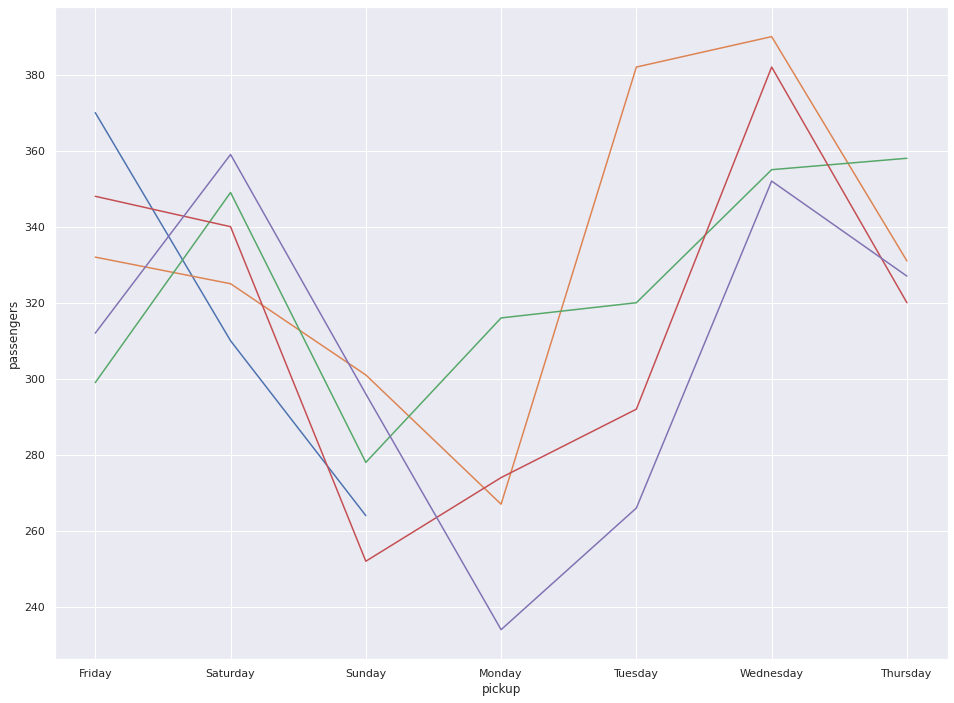

In [20]:
pass_df.groupby(pd.Grouper(freq='W')).apply(
    lambda x: sns.lineplot(x=x.index.day_name(), y=x.passengers)
)

Here we can see there is a weekly trend occuring, where Sundays and Mondays are usually less busy days.
The origin of this is hard to argue, as it might be less traffic, less taxi drivers working,...

Perhaps you could complete this visualisation by investigating the distance and/or tips?